# Explainer Notebook 

The explainer notebook describes how the project was carried out in terms of data collection, cleaning, analyses and what the idea with these steps were as well a reflection of what could have been executed better. This is done in 4 sections, as requested by the course administrator. 

The data collection and most of the cleaning was done using the scripts provided in the `exploration`-folder, whereas the preliminary data-analysis that was useful for the research questions was carried out in the `preliminary_analysis.ipynb`-file. The actual research questions were investigated in the files `RQ1.ipynb`, `RQ2.ipynb` and `RQ3.ipynb` and a brief overview of what they investigate as well as how they were investigated is given in the repository `README`-file.

Links: 
* [Website](https://philliphoejbjerg.github.io/ClimateGraph/)
* [Github](https://github.com/albertkjoller/Reddit-ClimateGraph)
* [Data](https://drive.google.com/drive/folders/1e2uLI2JjoN1DJW5UrvhNofq_fbWcLBev)

Individual Github links in NBviewer:
* [ReadMe](https://github.com/albertkjoller/Reddit-ClimateGraph/blob/main/README.md)
* [Preliminary Data Analysis](https://nbviewer.org/github/albertkjoller/Reddit-ClimateGraph/blob/main/preliminary_analysis.ipynb?flush_cache=true)
* [RQ1](https://nbviewer.org/github/albertkjoller/Reddit-ClimateGraph/blob/main/RQ1.ipynb?flush_cache=true)
* [RQ2]
* [RQ3](http://nbviewer.org/github/albertkjoller/Reddit-ClimateGraph/blob/main/RQ3.ipynb?flush_cache=true)

## 1) Motivation

> - What is your dataset?

Multiple datasets are considered in order to carry out the analyses - they can be accessed through [this link](https://drive.google.com/drive/folders/1e2uLI2JjoN1DJW5UrvhNofq_fbWcLBev). These consists of 1) the **Reddit-ClimateGraph dataset**, 2) the **Twitter Climate Change Sentiment dataset** and 3) the **EM-DAT Natural Disasters dataset**. In the following sections, these datasets will be described more exhaustively.

The main data source - namely the **Reddit-ClimateGraph dataset** - was deliberately collected for this project work. It consists of +500,000 submissions from Reddit posted in the period between the 1st of November 2014 and the 5th of April 2022. Of all submissions, a random sample of size 90,000 without replacement (using random seed of 42) were considered for collecting Reddit comments. This was done due to the delimited time availabel to carry out the project and resulted in extracting +1,000,000 comments from Reddit related to Climate Change. Both submissions and comments were collected using the `Pushshift API` with the queries `'climate change  climate'`, `'global warming  climate'`and `'warming planet  climate'`. This choice of query terms were chosen due to the fact that the Twitter Climate Change Sentiment dataset was collected from these terms. The Reddit-ClimateGraph dataset is divided into years, each containing four types of files; 1) a zipped json-file of the extracted submission with labelled sentiment, 2) a zipped json-file of the extracted comments with labelled sentiment, 3) a zipped json-file of the combined submissions and comments grouped by author-id's and 4) a json-file containing a `networkx` directed graph - the ClimateGraph - of nodes, edges and metadata.

To map an opinion score to the collect data from Reddit, the [**Twitter Climate Change Sentiment dataset**](https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset) (also see the [GitHub](https://github.com/edwardcqian/climate_change_sentiment)) - which in practice rather is a dataset on opinions and not sentiment - is a manually tagged dataset consisting of 43,943 Tweets collected in the period between  Apr 27, 2015 and Feb 21, 2018. These Tweets are annotated with the underlying opinions of the "man-made or not"-debate about climate change which are divided into four categories; 1) *'Anti'* 2) *'Neutral'*, 3) *'Pro'* and 4) as being *'News'*. The annotation procedure consisted of asking 3 reviewers about the opinion of a given Tweet - only Tweets on which all 3 reviewers agreed upon were included in the final dataset. As mentioned in the description of the Reddit-ClimateGraph dataset, the selected Tweets were found from the queries `'climate change  climate'`, `'global warming  climate'`and `'warming planet  climate'`.

The third dataset - namely the [**EM-DAT Natural Disasters dataset**](https://www.emdat.be/database) - is an expressive dataset describing several aspect of Natural Disasters and their societal impact. It is publicly available from the EM-DAT database after registering. For instance, it expresses the severity measured on attributes such as `deaths` for various types of natural disasters.

>- Why did you choose this/these particular dataset(s)?

The original idea was to extract Tweets related to Climate Change for investigations on networks and text rather than Reddit comments and submissions, however, the query limit on the free Twitter API was deemed as too limiting for the project to be well executed. To provide a more solid base for analyses and conclusions, Reddit was chosen due to the accessibility of the Pushshift API.

The time of the Reddit network was determined from the last two major IPCC report releases, namely the 5th Assesment report (November 2014) and the last part of the 6th Assesment report (April 2022). Within this period, the awareness of the Climate Change debate has risen, thereby providing a solid basis for examining the Reddit discussion both from a static point-of-view as well as from a dynamic point-of-view.

Due to the infeasability of querying the Twitter API, it was decided to use the Twitter opinion dataset for training an opinion classifier, that could be used to classify the opinions of Reddit posts. Following this approach was chosen based on the fact that there were no obvious, valid data-source of Reddit comments and submissions annotated with an opinion related to climate change.

Initially the thought was to include several types of events - like natural disasters, social events, relevant movie and documentary releases, etc. - in the analysis, however, we were not able to find such a dataset online. After having manually created a simple version of such a dataset containing event types, event names and dates of occurrence, we came to the realization that associating some sort of numerical value to the dataset would considerably allow for more interesting analyses and conclusions. The EM-DAT dataset was chosen for this reason, which resulted in a slight change of scope for research question 1, meaning that only climate change events of the type natural disasters were considered in the final project hand-in.


>- What was your goal for the end user's experience?

Our goal for the end user's experience was three-fold; 1) to communicate our findings intuitively as a data story in a webpage, 2) to provide a solid dataset about the Climate Change debate on Reddit and 3) to create a well-structured GitHub repository that enables others with an interest in the Climate Change debate to recreate our analyses.

## 2) Basic stats

> - Write about your choices in data cleaning and preprocessing

After querying the Pushshift API for comments and submissions, these were processed in a more or less equal way. First, the unix-time denoted as `created_utc` was mapped as a `datetime`-object in order to easier access days and years of submissions and comments. Submissions were filtered, such that the following attributes were kept:
 `['id', 'author', 'title', 'selftext', 'score', 'created_utc', 'subreddit', 'num_comments', 'all_awardings', 'awarders', 'total_awards_received']`.
The `title` and `selftext` attributes of the submissions dataframe were concatenated to a single string-representation denoted as `text`. Similarly, the comments were filtered and the following attributes were kept: `['id', 'link_id', 'score', 'created_utc', 'author', 'parent_id', 'body', 'controversiality', 'total_awards_received', 'all_awardings', 'associated_award']`. Here, the attribute `body` was renamed to `text`.

The textual comment of comments and submissions were processed in the same way. So far, comments and submissions with the textual content being `[deleted]` were kept and instead removed in processing of the graph. Other than that, the following pipeline was followed, for cleaning each comment or submission:

    1) Tokenize to words with NLTK
    2) Lowercase
    3) Remove stop-words (English from NLTK)
    4) As an alternative to regular expression:
        4.1) Remove non-alphabetical tokens
        4.2) Remove webpages (by looking for substrings 'http' and 'https')
        4.3) Remove special tokens (like the Twitter specific 'RT')
    5) Stem the words
    
The reason that point 4 is an alternative to regular expressions is describe in section 3.

This processing pipeline is equivalent to the one used in the pre-processing of the Twitter Climate Change Sentiment dataset, in order to provide the same basis when using the trained Opinion Classifier. Joining the cleaned set of tokens related to a given Reddit post resulted in a clean string-representation. These representations were fed to the Opinion Classifier that mapped one of the previously four mentioned labels to the text. The processed text, labels and prediction probabilities were appended to the dataframe that was then stored.

The exact same processing pipeline was followed for the Tweets in the Twitter Climate Change Sentiment dataset. Additionally, the Twitter data was balanced since it was to be used for training an unbiased Opinion Classifier.

As for the actual graph, ClimateGraph, it was constructed as a directed graph by linking author id's to parent id's. Comments with no parent author were removed. Furhtermore, it was observed that the earliest years of the regarded period had solely NaN-values for attributes related to awards. These were replaced with 0's for numerical attributes and empty lists or strings based on the attribute type. Deleted users were removed and the classified opinion label was expressed numerically as -1 for 'Anti', 1 for 'Pro' and 0 for 'News' and 'Neutral'. This data was used to group submissions and comments by the authors after which the following metadata was collected by either summing, averaging or concatenating, when an author had multiple posts: `['text', 'all_awardings', 'total_awards_received', 'score', 'opinion_score', 'first_comment', 'last_comment', 'first_submission', 'last_submission', 'num_comments', 'num_submissions', 'comment_controversiality']`. The opinion score was averaged yielding a numerical score in the range [-1, 1]. For some analyses, this was remapped to a label space where an average author opinion score of [-1, -1/3] is 'Anti', [-1/3, 1/3] is 'Neutral' and [1/3, 1] is 'Pro'. In the final graph, self-loops and singletons were removed.

As for the EM-DAT dataset, rows in which one of the columns of interest were a NaN-value, were removed. Furthermore, the original dataset only associated data to a natural disaster event as one row, i.e. by having the start- and end-dates as attributes in the dataframe. Since this data was to be investigated along with a time-series of daily opinion and daily activity on Reddit, the EM-DAT dataset was restructured. The dataframe was exploded to have an index for all days within the start-to-end period of a given event. The numerical data - such as the number of affected people and number of deaths - were averaged across all days within the exploded period, thus obtaining a daily time-series. For days having occurrences of several natural disasters, numerical data was summed and string-data was concatenated. The choice of mapping the attributes related to a natural disaster uniformly across the period between the start- and end-date might not reflect the true distributions, as the number of deaths could easily be thought to decrease rapidly after the day of impact. 
The preprocessed data resulted in the following attributes: `['disaster type', 'continent', 'mean deaths', 'mean affected']`.


>- Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

A full walk-through of the preliminary analysis is carried out in the dedicated notebook `preliminary_analysis.ipynb`. This section solely describes the stats of the datasets and it is emphasized that more expressive analyses and findings are found in the `preliminary_analysis.ipynb`-notebook.

The complete Reddit dataset of submissions consists of a total of **572,747** data point entries, each containing 16 attributes. Of these submissions, **15406** contained the text `[deleted]` yielding a total of **557341** submissions with textual content.

The complete Reddit dataset of comments consists of a total of **1,020,327** data point entries, each containing 16 attributes. Of these submissions, **95,383** contained the text `[deleted]` yielding a total of **924,944** submissions with textual content.

Combining these and grouping by authors reveal that there are **345,645** number of unique authors across all years in the dataset. The distribution of these - stratified by year - is visualized in the figure below.

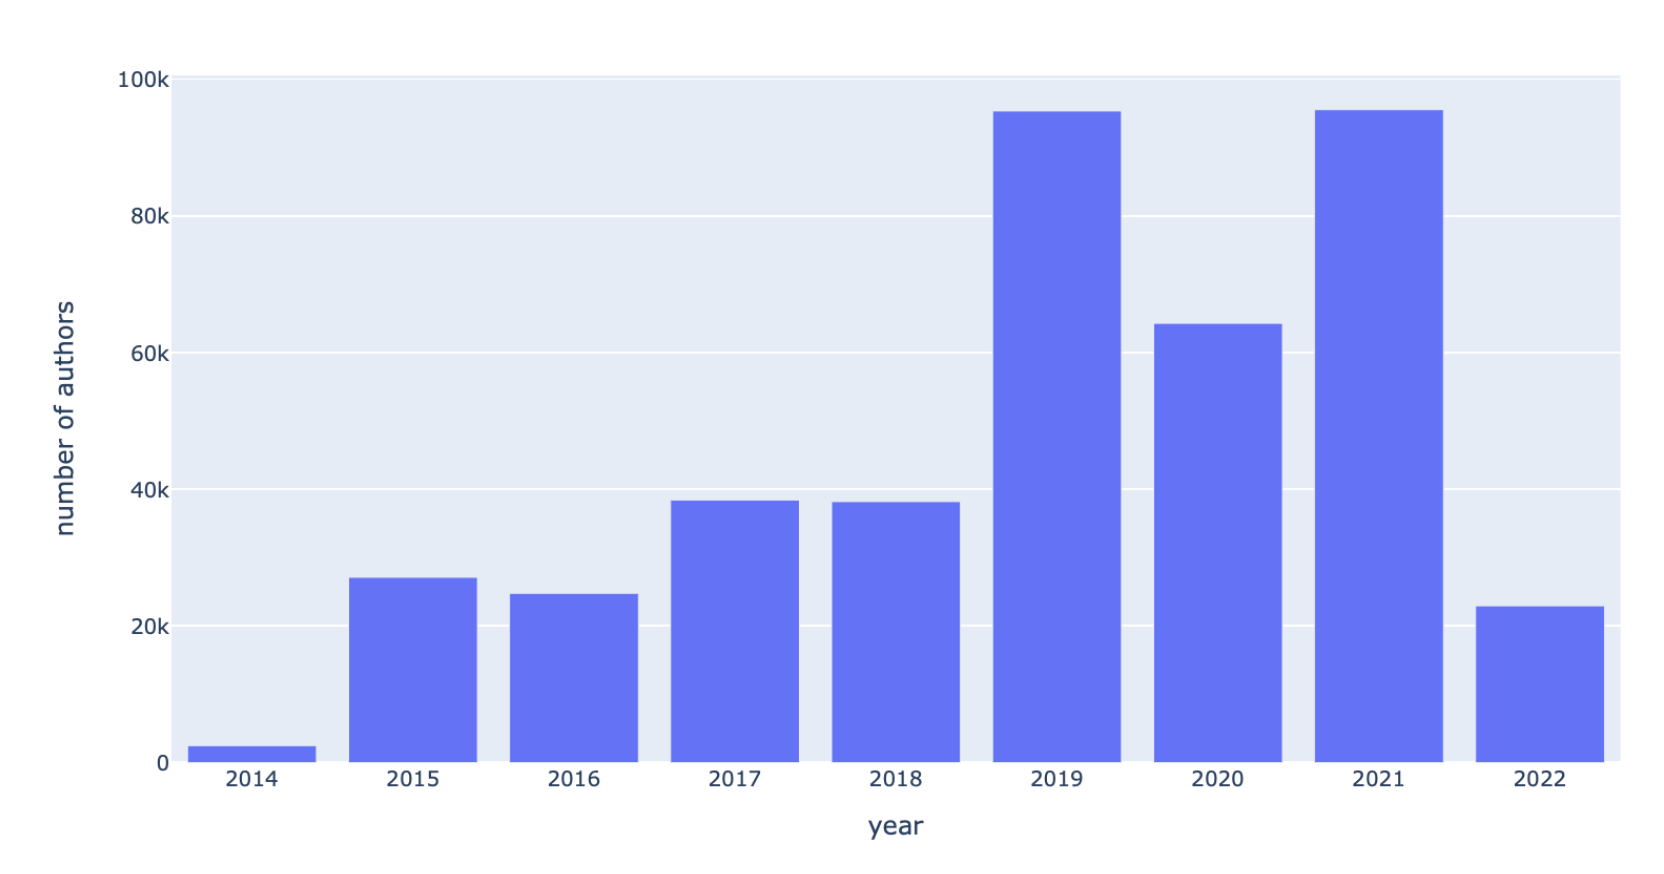

The analyses were restricted to analyse the network of Reddit authors within a single year (namely 2020) due to the infeasability of considering a complete graph of all 8 years. The 2020-ClimateGraph contained a total of **64,260** nodes (authors) connected by **95,736** edges. The degree-distribution follows a power law (as can be seen below) which is also the case for the in- and out-degree distributions.

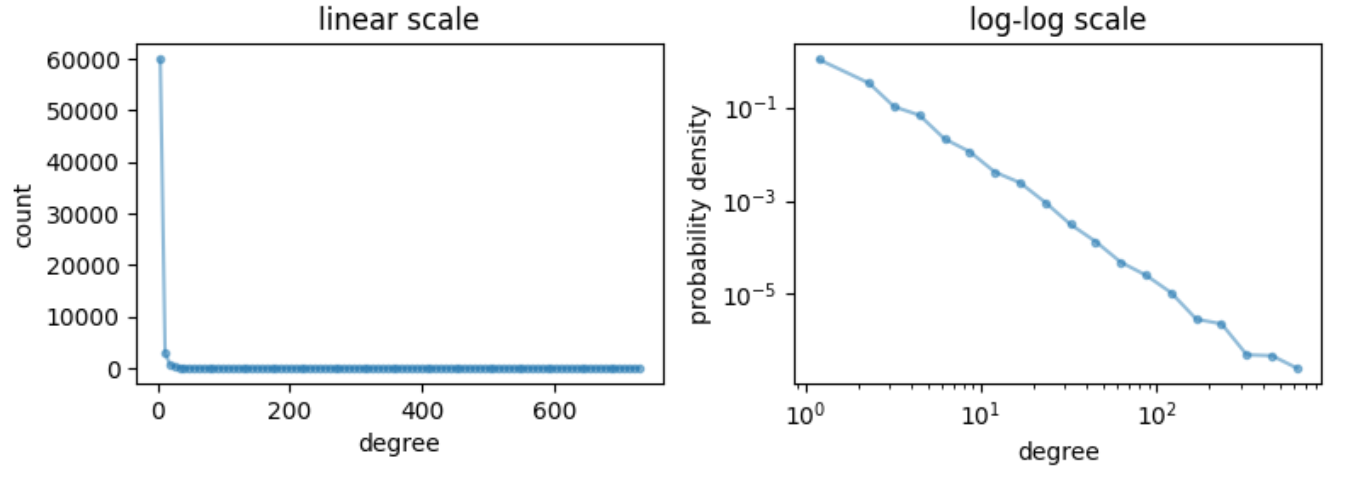


The EM-DAT dataset originally contained **3181** entries of which **1477** were deleted since they contained NaN-values. After following the pre-processing - and thereby exploding the dataframe by days - the dataset contained **16511** entries.

All in all, the complete dataset - which is considered as the mixture of Reddit posts, submissions, auhtors and the directed graph as well as the Twitter and EM-DAT data - is of size **1.96 Gigabytes**, when downloading the zipped folder from our [Google Drive](https://drive.google.com/drive/folders/1e2uLI2JjoN1DJW5UrvhNofq_fbWcLBev) folder. The yearly files can be downloaded separately and are of various size depending on the year.


## 3) Tools, theory and analysis. Describe the process of theory to insight

**NOTICE: this section provides a general overview of the applied methods. Further and richer descriptions of how the approaches were used in analyses are given in the RQ1-RQ3.ipynb files as well as in the preliminary_analysis.ipynb. We advice to check them out.**

> - Talk about how you've worked with text, including regular expressions, unicode, etc.

Most of the textual work was carried out in the preprocessing / data preparation step of the project and was done using the previously mentioned processing pipeline including tokenization, removing stop-words and other irrelevant terms and stemming. No direct regular expressions were considered in the processing, due to a choice of removing all tokens with a non-alphabetical substring. This filtering was done in order to restrict the classifier to focus on alphabetical content, since incorporating the ambiguity of numerical textual content or webpage-URLs was deemed as too large of a scope for what this project aimed at. Similarly, the choice of stemming word token was taken in order to simplify the vocabulary and downscale the processing time.

The opinion classifier - which was trained as a Random Forest Classifier - was created as a `sklearn`-pipeline object where text was firstly mapped to a Bag-Of-Words representation that were then used to obtain TF-IDF scores, to vectorize each submission or comment in a manner where relevant terms were not overlooked by terms occurring in general for texts in the climate change debate.


> - Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.

In order to find 'naturally' occuring communities within the network the Louvain algorithm was applied. This choice was made since it is widely used, performs fast computations and works by optimizing modularity in a greedy and iterative manner, which was important for us when dealing with large amounts of data. The modularity is a measure of the strength of division of the chosen network and thus yield a high score when nodes within a module are densely connected to eachother but sparsely connected to nodes from other modules. The formula for modularity is given in the belo [figure](https://en.wikipedia.org/wiki/Modularity_(networks).

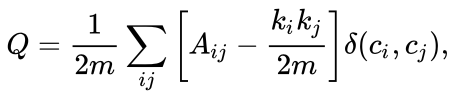

Since a lot of the communities found by the Louvain algorithm consisted of three or fewer nodes only the top 100 largest of these communities were further investigated.


An initial investigation of authority and hub nodes using the HITS algorithm was carried out and revealed that many of the hubs associated to the top authority nodes consisted of less than 10 nodes. The HITS algorithm iteratively updates authority and hub-values for nodes, that are recursively and interlinkedly defined. The highest ranking authority nodes are thus not necessarily the ones with the largest outreach and is not always ensured to converge. This way of thinking of authority nodes were however not of interest, as we aimed at determining whether one authority could affect opinion scores of a larger group (the hub), thus needing a numerically high outreach.

We used several statistical tests in order to prove the validity of the trends observed in the data. More expressive descriptions are given within the `RQ1-RQ3`-notebooks as well as in the `preliminary_analysis`-notebook, however, a brief overview and motivation of the methods is here given.

As for comparing time-series of people affected by Natural Disasters, number of posts on Reddit and the daily sentiment, pearson correlation tests where carried out. This type of test compares matched data points of time series to check if attributes follow the same trend. As always, it is important to remember, that correlation is not causation!

Pearson correlation do however not account for potential shifted correlation between variables, which is of much higher interest when investigating e.g. the Reddit activity in relation to natural disaster events. Here, there is a natural time-order ensuring that posts about a surprisingly occurring natural disaster can not be created before the event has actually occurred. What is not covered by the Pearson correlation test is that reactions on the online media, Reddit, is most likely delayed compared to the occurrence of a natural disaster and that the human attention span is mostly longer than the time period in which an event occurs. This was adressed by applying a Granger Causality test, that tries to explain whether one variable can be said to cause another variable occurring at a future time index. This test assumes that the examined time series are stationary (followed this [blogpost](https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2)) which can be tested using the Augmented Dickey-Fuller - in other words how strongly a time-series is defined by a trend. If the time series is not stationary, it can be transformed into a stationary time series by applying the difference method, that subtracts a shifted version of the time series from the true time series.

When the time series are stationary, the Granger Causality test can be applied to infer whether a cause variable, X, can be said to Granger cause another variable, the effect variable Y. This is in practice done y fitting two Vector Autoregression Models (VAR) that linearly describe how a set of $k$ variables, $y_t$, evolve over time. $$y_t = A_1 y_{t-1} + A_2 y_{t-2} +... A_{p} y_{t-p} + \epsilon$$

The VAR model uses a lag-parameter determining how far in the past time-series are considered.

Granger Causality is based on the VAR model in such a way that it first fits a VAR model on the Granger effect variable, secondly fits a VAR-model of both the Granger cause and effect variables and sum them, after which a statistical test (like the Chi^2) can be applied to determine whether there is a significant difference between these two VAR-models. If the significance is difference, we say that the effect variable, Y, is Granger caused by the cause variable X.

For other analyses, the validity were analysed using the Welch's T-test or by using its non-parametric paired version, the Wilcoxon Signed Rank-Sum test, depending on the distribution of the investigated data attributes. As an example, whether the variation of opinion scores for recurrent authors within two following years were significant or not, the Wilcoxon Signed Rank-Sum was applied since the opinion score distributions were found to not follow Gaussian distributions.

> - How did you use the tools to understand your dataset?

The network science tools and text processing tools were combined within RQ2 to elevate the analysis, by qualitatively analyzing the textual content of some communities found using the Louvain method. The high-ranking words - wrt. TF-IDF scores - were visualized in WordClouds for emphasizing relevant terms and for easening the interpretability of the community discussion.


## 4) Discussion


> - What went well?

In general we put a lot of effort in obtaining an expressive dataset which was done in a well-structured manner. Processing the huge amount of data could have been a bottleneck for analyses, but we managed to work-around this by using the DTU GBAR for computational expensive queries.

The ClimateGraph network evolution was not a part of the initial plan but showed significant findings for our conclusions and general considerations on how to approach the research questions. Also, we spent quite some time on preliminary analyses that turned out to reveal interesting conclusions and provided a basis on how to determine assumptions and limitations of the project work.

What worked out well was that we put in an effort in creating a well-described initial project plan describing the general scope, the research questions and how to approach them as well as started the reflections on when to prioritize what parts of the project work, in order to succesfully finish the project.


> - What is still missing? What could be improved?, Why?

As is often the case when digging into a project work, the findings of this project work have created more wondering question than the amount of answered questions. The initial plan succeeded and the finalized project can - in our opinion - indeed be regarded as a finished study, but several things could be improved or incorporated in the analyses if the project weren't restricted by time constraints.

 
##### Classifier
*(See the `preliminary_analysis.ipynb` for some of the actual analyses)*

First of all, the classifier had a test accuracy of 60% balanced accuracy. Even though it was found (from investigating the confusion matrix) that the general classification trend was somewhat correct, the classifier still confused the 'Pro'-class with 'News' and 'Neural', which might be the reason that our analyses suggest a general negative opinion when investigating the network - both within the year 2020 and across all years. 


##### Opinion mapping

To answer the research questions that deal with network science, we needed to combine opinion labels of posts of an author as a shared representation. Based on findings in the preliminary analysis of the distribution of opinion scores, we deemed it feasible to average opinions of all texts written by an author, to get an opion score distribution in the range [-1, 1] that was not biased by the number of submissions and comments of an author that was found to follow a power-law. In the process of mapping labels we needed to define how the label 'News' were to be mapped. Unfortunately, we had some misunderstandings in the group and ended up mapping 'News' as NaN-values for research question 1 whereas 'News' were mapped to the value 0 in research question 2 and 3. Ideally we would have carried out the analyses once again with a single mapping of 'News' category to value, but by the time of realization, we were too close to the project deadline.

##### Temporal aspect

The year 2020 was deemed as a potential static year due to the lower number of authors' first- and last-posts, however, this assumption is quite weak due to the potential network drift that is associated to Big Data. Basing the choice of year on the period of first- and last-posts is simply one way of doing it, and the period of interest could e.g. have been selected based on the confidence of predictions instead. Using the confidence of predictions the classifier would not necessarily have been more correct but it would definitely be easier to trust the predictions of the classifier, instead of blindly trusting the classifier even in situations where it might only have been slightly more certain on a post being "Anti" and not "Pro". Second of all, the year-dependent analyses carried out in research question 2 and research question 3 would most probably have revealed different findings if a different year had been selected.

##### Tools and analysis

During the finalization of the project we considered using a different community detection algorithm like Leiden since it compensates for some of the drawbacks of the Louvain algorithm of arbitrarily internally disconnected communities.
Furthermore - in RQ2 - some of the most relevant words within each community (TF-IDF) seemed to be two joined words, which could indicate that something went wrong in preprocessing of the text and should be looked into in future work.


All in all, we were excited about working with the project and obtained a lot of insights into Reddit, the Climate Change discussion as well as network science and text processing tools.